## Cargar librerías y datos

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === Cargar datos ===
ratings = pd.read_csv('ml-32m/ratings.csv')
movies = pd.read_csv('ml-32m/movies.csv')

# Unir datasets por movieId
data = ratings.merge(movies, on='movieId', how='left')

print("Registros cargados:", len(data))
data.head()

Registros cargados: 32000204


,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,944250228,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,943230976,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
4,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


## Distribución de ratings

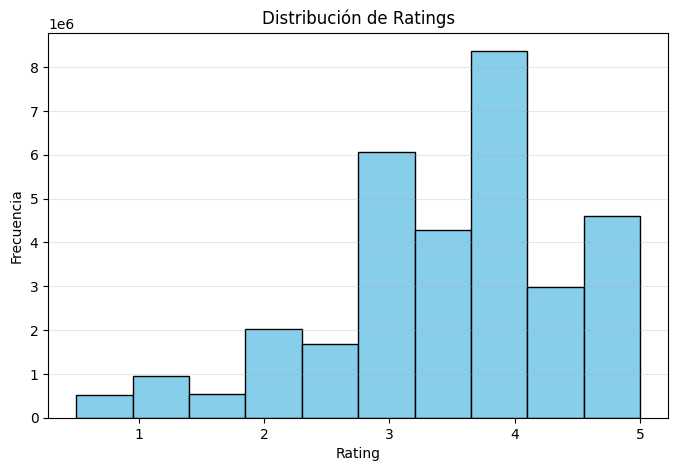

In [6]:
plt.figure(figsize=(8,5))
plt.hist(data['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()

## Promedio de rating por género

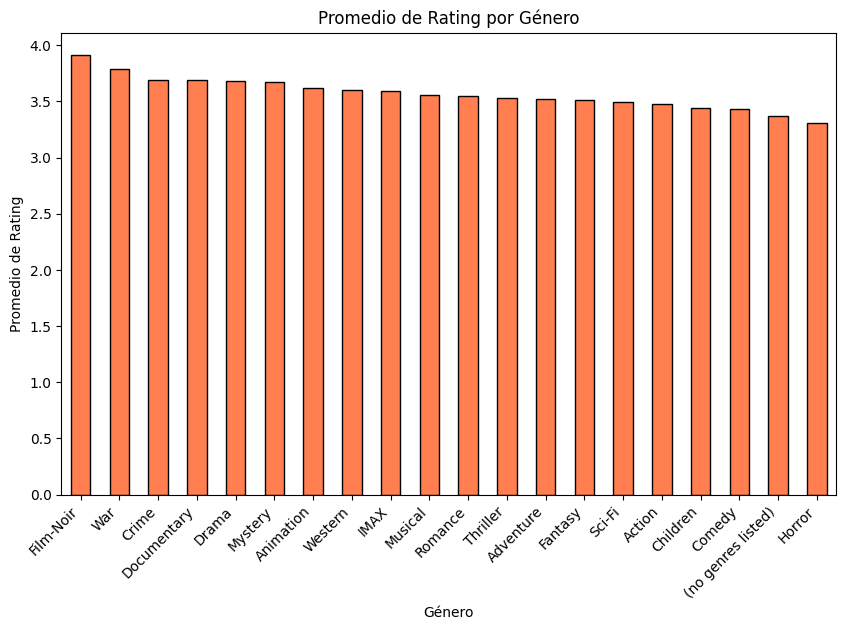

genres
Film-Noir      3.915774
War            3.791699
Crime          3.691771
Documentary    3.691182
Drama          3.682454
Mystery        3.673103
Animation      3.615332
Western        3.600175
IMAX           3.593312
Musical        3.554277
Name: rating, dtype: float64

In [7]:
# Separar géneros y calcular promedio de rating
data_genres = data.assign(genres=data['genres'].str.split('|')).explode('genres')
genre_avg = data_genres.groupby('genres')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
genre_avg.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Promedio de Rating por Género')
plt.xlabel('Género')
plt.ylabel('Promedio de Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

genre_avg.head(10)

## Cantidad de películas por género

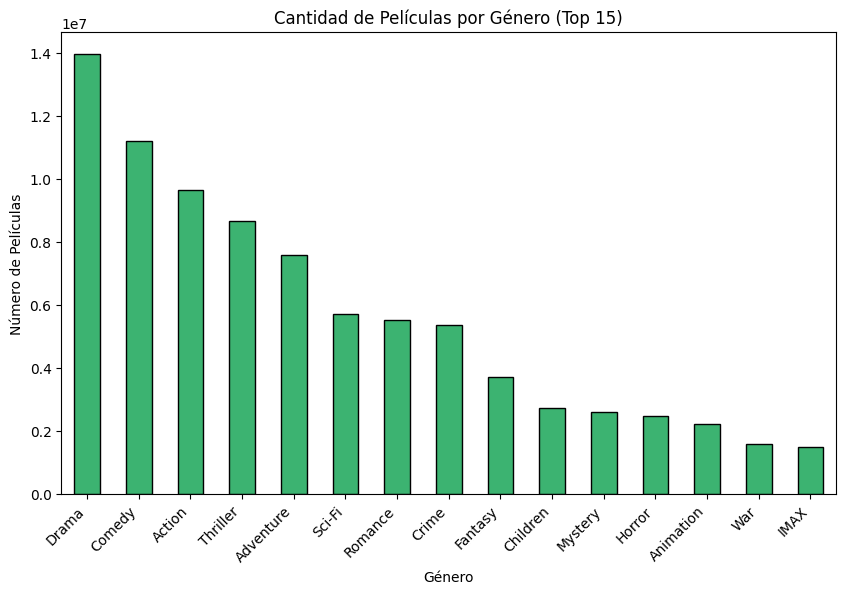

genres
Drama        13973271
Comedy       11206926
Action        9665213
Thriller      8679464
Adventure     7590522
Sci-Fi        5717337
Romance       5524615
Crime         5373051
Fantasy       3702759
Children      2731841
Name: count, dtype: int64

In [8]:
genre_count = data_genres['genres'].value_counts().head(15)

plt.figure(figsize=(10,6))
genre_count.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Cantidad de Películas por Género (Top 15)')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45, ha='right')
plt.show()

genre_count.head(10)